In [63]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [64]:
def rotate(n: int, fn):
    alpha = 2*math.pi*fn(n)

    #rotate unit vector [0, 1] by "alpha"
    x = -math.sin(alpha)
    y = math.cos(alpha)
    return (x, y)

def intersect(n: float, fn_l, fn_f, e=0.001):
    line1 = (rotate(n, fn_f), rotate(fn_l(n), fn_f))
    p1 = [line1[0][0], line1[0][1]]
    p2 = [line1[1][0], line1[1][1]]

    line2 = (rotate(n+e, fn_f), rotate(fn_l(n+e), fn_f))
    q1 = [line2[0][0], line2[0][1]]
    q2 = [line2[1][0], line2[1][1]]

    # Line 1 dy, dx and determinant
    a11 = p1[1] - p2[1]
    a12 = p2[0] - p1[0]
    det1 = p1[0]*p2[1] - p2[0]*p1[1]

    # Line 2 dy, dx and determinant
    a21 = q1[1] - q2[1]
    a22 = q2[0] - q1[0]
    det2 = q1[0]*q2[1] - q2[0]*q1[1]

    # determinants for solving system of linear equations
    # a11*x + a12*y + det1 = 0
    # a21*x + a22*y + det2 = 0
    detx = a12*det2-a22*det1
    dety = det1*a21-det2*a11
    det = a11*a22-a21*a12

    if det != 0:
        intersection = (detx/det, dety/det)
        return intersection
    else:
        return None
    
    # Alternative way of solving system of linear equations:
    # coefficient matrix A, right hand side vector b
    
    # A = np.array([[a11, a12], [a21, a22]]) 
    # b = -np.array([det1, det2])
    # try:
    #    intersection = np.linalg.solve(A,b)
    #    #print("{0}\n{1}\n\{2}\n".format(line1,line2,intersection))
    #    return intersection
    # except np.linalg.LinAlgError:
    #    return None

#print(intersect(0.4))

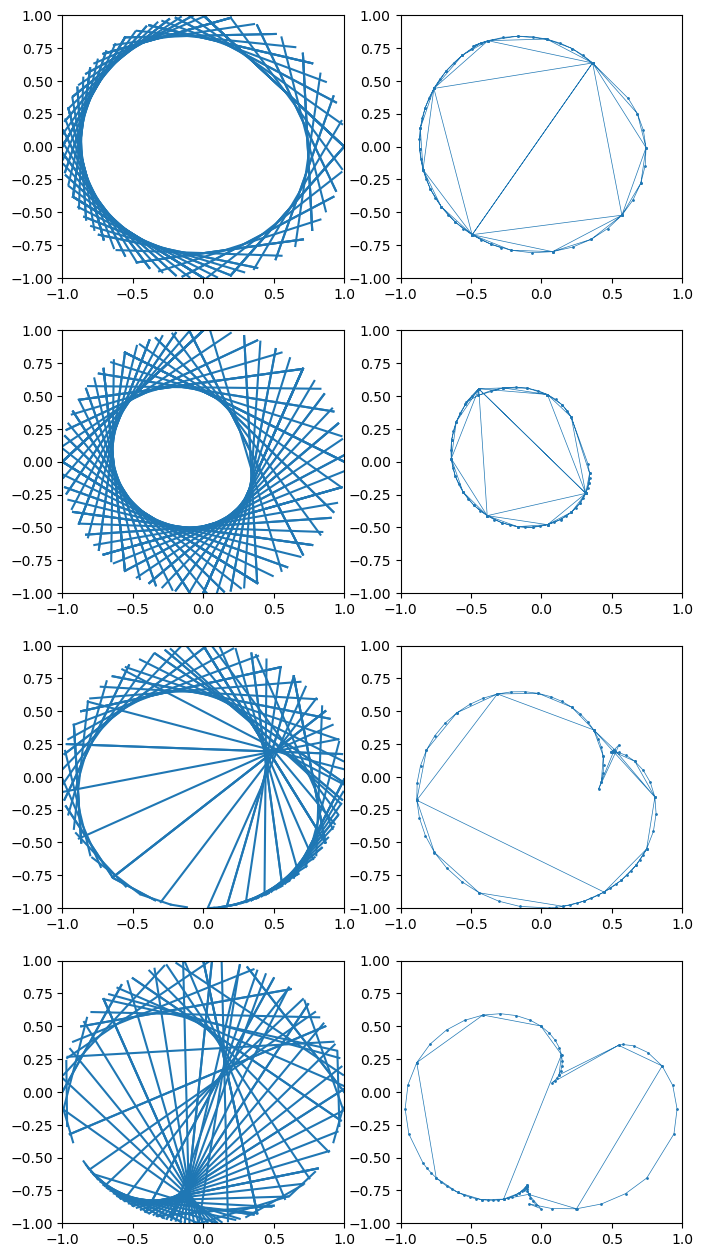

In [65]:
def draw_line(ax, line):
    ax.add_line(mlines.Line2D([line[0][0], line[1][0]], [line[0][1], line[1][1]]))

def draw_dot(ax, pos):
    plt.scatter(pos[0], pos[1], s=2, c='#0000FF')

def plot(row, fn_l, fn_f):
    lines=[]
    intersections=[]
    for n in np.arange(start, stop, step):
        line = (rotate(n, fn_fact), rotate(fn_line(n), fn_fact))
        lines.append(line)
        intersection=intersect(n, fn_line, fn_fact)
        if intersection is not None:
            intersections.append(intersection)

    for line in lines:
        draw_line(ax[2*row], line)

    ax[2*row+1].plot(*zip(*intersections), '-o', markersize=1, linewidth=0.5)

subplot_size=4
subplot_rows=4
subplot_cols=2
fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()
for i in range(subplot_rows*subplot_cols):
    ax[i].set_xlim([-1,1])
    ax[i].set_ylim([-1,1])


start=1
stop=100
step=1

fn_line = (lambda n: n*7)
fn_fact = (lambda n: n/(2**(int(math.log(n,2))+1)-2**int(math.log(n,2))))
plot(0, fn_line, fn_fact)

fn_line = (lambda n: n*10)
fn_fact = (lambda n: n/(2**(int(math.log(n,2))+1)-2**int(math.log(n,2))))
plot(1, fn_line, fn_fact)

fn_line = (lambda n: n**2)
fn_fact = (lambda n: n/(3**(int(math.log(n,3))+1)-3**int(math.log(n,3))))
plot(2, fn_line, fn_fact)

fn_line = (lambda n: n**3)
fn_fact = (lambda n: n/(4**(int(math.log(n,4))+1)-4**int(math.log(n,4))))
plot(3, fn_line, fn_fact)

plt.show()